## 数据划分

**实验任务：**将泰坦尼克号乘客数据集划分为训练集和测试集

**实验课时：**0.5课时

**实验目的：**

* 了解数据划分在机器学习中的作用；
* 理解欠拟合、正确拟合和过拟合的概念；
* 掌握随机抽样划分的实现方法；
* 掌握分层抽样划分的实现方法。

通常我们把分类错误的样本数占样本总数的比例称为错误率（error rate），即如果在$m$个样本中有$a$个样本分类错误，则错误率$E=a/m$；相应的，$1-a/m$称为精度（accuracy）。模型在训练集上的误差称为训练误差，在新样本上的误差称为泛化误差（generalization error）。

我们希望得到泛化误差小的模型，应该从训练样本中尽可能学出适用于所有潜在样本的普遍规律。然而，当模型把训练样本学的太好了的时候，很可能已经把训练样本自身的一些特点当做了所有潜在样本都会具有的一般性质，导致泛化性能下降，这种现象称为过拟合（overfitting）。与过拟合相对的是欠拟合，是指对训练样本的一般性质尚未学好。下图给出的例子便于直观理解。

<table><tr>
    <td>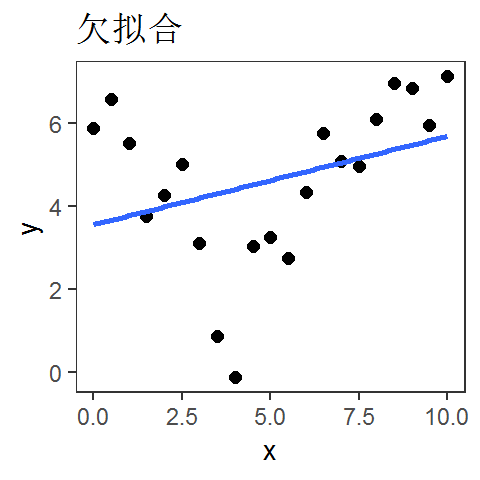</td>
    <td>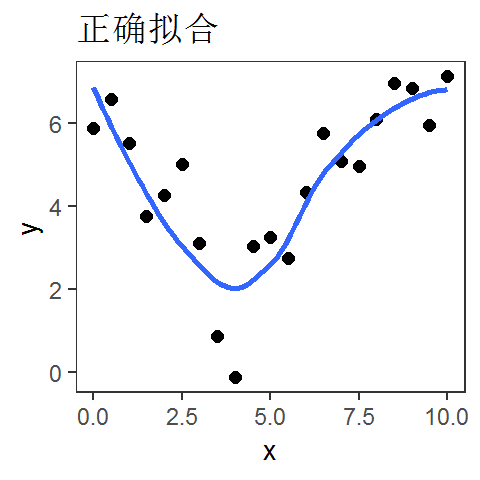</td>
    <td>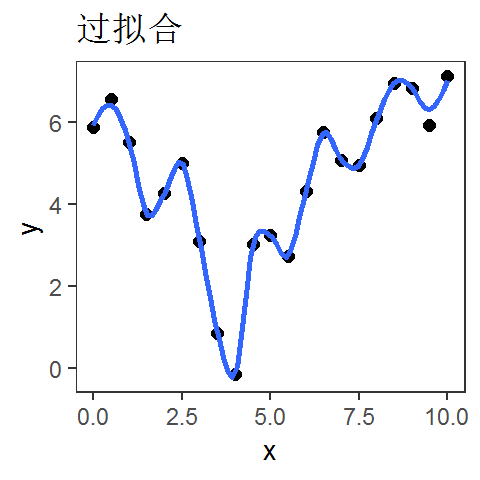</td>
</tr></table>


通常，我们通过实验测试来对模型的泛化误差进行评估，为此需要使用一个测试集来测试模型对新样本的判别能力，然后以测试集上的测试误差作为泛化误差的近似。而该测试集通常仅能使用一次，如果多次使用测试集做评估，则无形之中测试集也充当了训练模型的作用，则测试误差会低估泛化误差。因此，我们会进一步将训练集划分成训练集和验证集，使用验证集多次模型进行评估并进而做出选择，如下图所示。


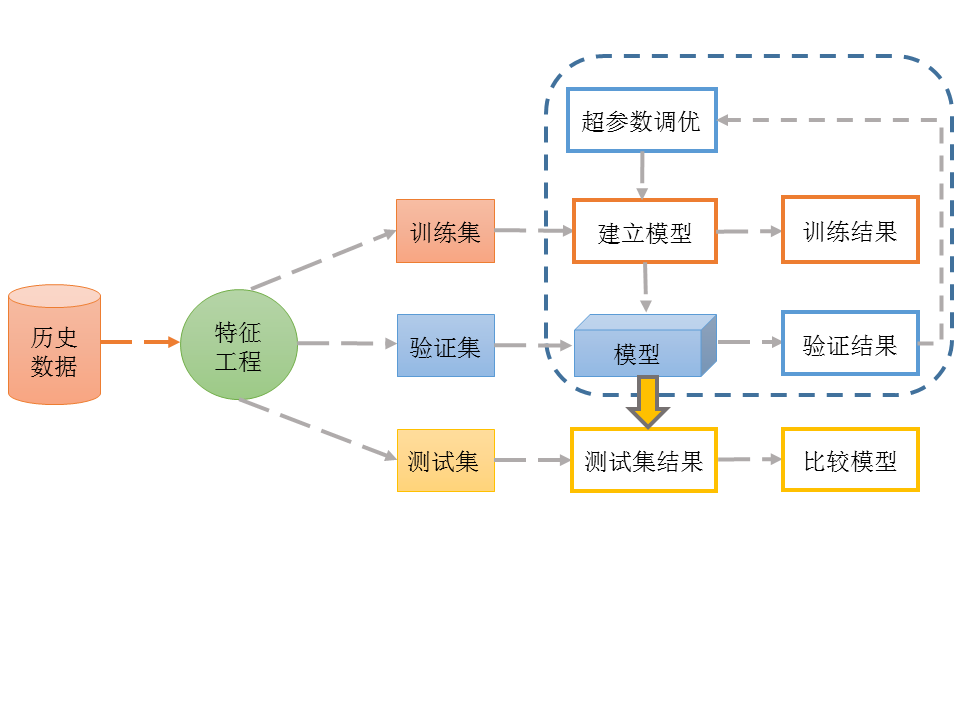

载入需要用到的程序包。

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

读取读取泰坦尼克号乘客数据集。

In [14]:
titanic3_file_path="./titanic3.xls"
titanic3 = pd.read_excel(titanic3_file_path)
titanic3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 1. 随机抽样划分

并非所有变量都有预测能力，例如乘客的名字对于是否生存并没有任何相关性。选取7个有预测意义的变量作为自变量，是否生存（变量`survived`）作为因变量。

In [15]:
X = titanic3[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic3['survived']

调用程序包`sklearn.model_selection`中的函数`train_test_split()`将数据集随机划分为训练集和测试集，其中

* 第1个或多个参数表示需要划分的自变量数据集和因变量数据集；
* 参数`test_size`表示测试样本比例或数量；
* 参数`train_size`表示训练样本比例或数量；
* 参数`random_state`表示随机数的种子；
* 参数`shuffle`表示是否打乱顺序，默认为是；
* 参数`stratify`表示是否分层抽样；
* 返回结果为自变量训练集、自变量测试集、因变量训练集和因变量测试集。
    
这里随机抽取70\%的样本作为训练集，并且仅保留有预测意义的变量。

In [16]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 123)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(916, 7)
(393, 7)
(916,)
(393,)


计算训练集和测试集中因变量的数值分布。

In [17]:
train_y.value_counts() / len(train_y)

0    0.616812
1    0.383188
Name: survived, dtype: float64

In [18]:
test_y.value_counts() / len(test_y)

0    0.620865
1    0.379135
Name: survived, dtype: float64

可以看出，训练集和测试集中是否生存的乘客比例基本一致，但还是有一定差别。

### 2. 分层抽样划分

对于数据量不大的数据集，更安全的划分方式是分层抽样，即确保因变量的数值分布在训练集和测试机中保持一致。

调用程序包`sklearn.model_selection`中的函数`train_test_split()`指定参数`stratify`为因变量。

In [19]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, stratify = y)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(916, 7)
(393, 7)
(916,)
(393,)


计算训练集和测试集中因变量的数值分布。

In [20]:
train_y.value_counts() / len(train_y)

0    0.617904
1    0.382096
Name: survived, dtype: float64

In [21]:
test_y.value_counts() / len(test_y)

0    0.618321
1    0.381679
Name: survived, dtype: float64

可以看出，训练集和测试集中是否生存的乘客比例几乎完全一致。